In [1]:
import os
import fitsio
import pylab as pl
import numpy as np
import matplotlib.pyplot as plt

from   astropy.table import Table
from   cosmo import cosmo
from   fsky import fsky

In [2]:
fpath = os.environ['CSCRATCH'] + '/desi/BGS/Sam/randoms_slice.fits'

In [3]:
print(fpath)

/global/cscratch1/sd/mjwilson/desi/BGS/Sam/randoms_slice.fits


In [4]:
rand = Table(fitsio.read(fpath))

In [5]:
len(rand)

67199

In [6]:
rand

RANDOM_RA,RANDOM_DEC,Z,V,RANDID,FIELD,CARTESIAN_X,CARTESIAN_Y,CARTESIAN_Z,IS_BOUNDARY,N8,BOUND_DIST,BOUND_ID
float64,float64,float64,float64,int64,str2,float64,float64,float64,int64,int64,float64,int64
133.20985584335546,0.29970355375684954,0.4898384468726457,9668241503.227621,1,G9,1320.8983332620119,-41.48458120978091,-4.761775712801242,0,3,53.00638141021709,0
134.88439506506091,-0.06196029998053956,0.4185797400832694,6341085756.410868,13,G9,1148.1605280240176,-2.4916590416279405,-11.389831549516824,0,3,38.841150985152964,0
130.1864576763631,-0.6824307221292909,0.4886524584817224,9606213362.63223,18,G9,1313.7746083762963,-110.85105056685552,-27.3190174935843,0,2,26.166714579265403,0
139.10813210565294,-1.6867286436496118,0.48753845801201157,9548157231.796413,19,G9,1311.734391963161,94.04078467009879,-50.333324108724334,0,3,7.320489326938071,0
134.3024418202275,-1.88867900871588,0.4389636263215052,7210456417.038236,22,G9,1197.3252729313735,-14.765083521749375,-50.08276267753524,0,1,11.30832830583375,0
136.89117817953448,-1.1324647159742225,0.4841483889671844,9372716722.555573,24,G9,1306.712730866581,42.95662310410637,-37.40079656053272,0,2,21.725588093640734,0
130.37318968753925,0.8681634089815066,0.4537616083113076,7882688129.697061,25,G9,1230.544087372347,-99.7659590219829,7.830918246797685,0,1,29.581608742170108,0
132.98850575994427,2.6517955528483266,0.49244283321384885,9805250958.983511,30,G9,1326.016499028072,-46.75678234029681,49.71305814491804,0,5,8.405350562535034,0
134.60107529903487,-1.429137890325443,0.47266057982152326,8791983162.256039,33,G9,1279.5990084744694,-9.106717297315754,-43.24402214731556,0,3,12.79817735950218,0


(-3.0, 4.0)

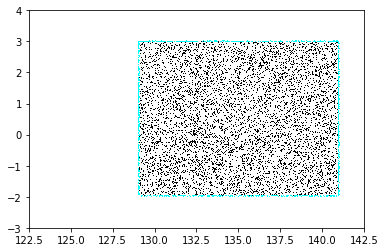

In [46]:
pl.plot(rand['RANDOM_RA'][::10], rand['RANDOM_DEC'][::10], marker=',', lw=0.0, c='k')
pl.plot(rand['RANDOM_RA'][rand['IS_BOUNDARY'].astype(bool)], rand['RANDOM_DEC'][rand['IS_BOUNDARY'].astype(bool)], marker=',', lw=0.0, c='cyan')

pl.xlim(122.5, 142.5)
pl.ylim(-3., 4.)

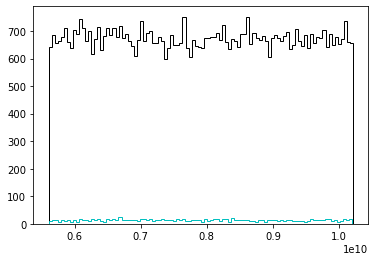

In [47]:
_ = pl.hist(rand['V'], bins=100, histtype='step', color='k')
_ = pl.hist(rand['V'][rand['IS_BOUNDARY'].astype(bool)], bins=100, histtype='step', color='c')

(0.0, 0.6)

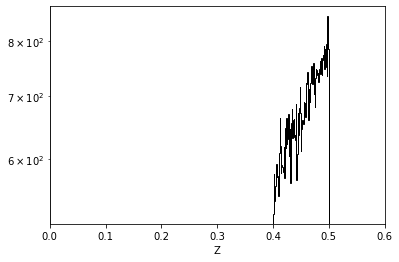

In [48]:
_ = pl.hist(rand['Z'], bins=100, histtype='step', color='k')
pl.axvline(300. / 2.9979e5, lw=0.5, c='k')
pl.yscale('log')
pl.xlabel('Z')

pl.xlim(0.0, 0.6)

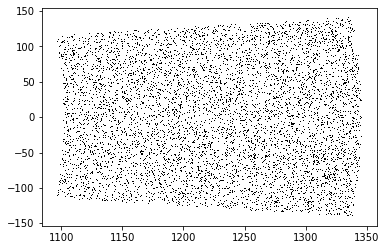

In [49]:
pl.plot(rand['CARTESIAN_X'][::10], rand['CARTESIAN_Y'][::10], marker=',', lw=0.0, c='k')

Text(0, 0.5, 'y')

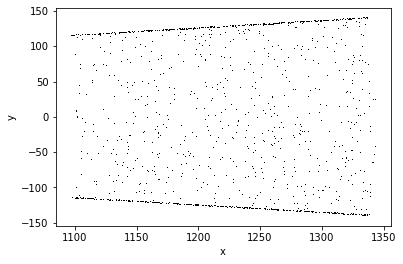

In [50]:
pl.plot(rand['CARTESIAN_X'][rand['IS_BOUNDARY'].astype(bool)], rand['CARTESIAN_Y'][rand['IS_BOUNDARY'].astype(bool)], marker=',', lw=0.0, c='k')
pl.xlabel('x')
pl.ylabel('y')

(0.0, 1600.0)

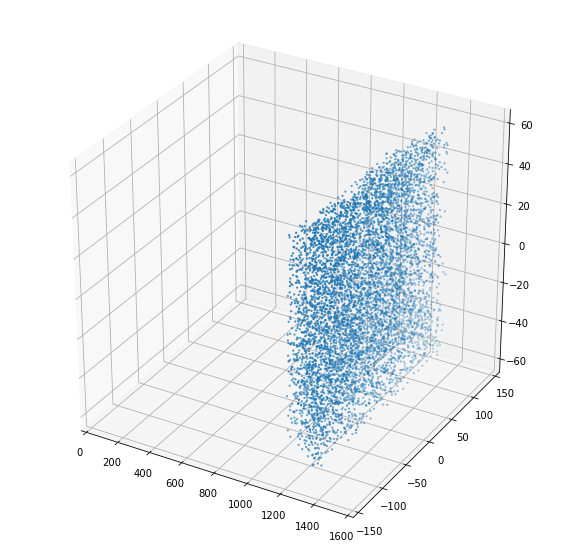

In [51]:
fig = plt.figure(figsize=(10,10))
ax  = fig.add_subplot(projection='3d')

ax.scatter(rand['CARTESIAN_X'][::10],\
           rand['CARTESIAN_Y'][::10],\
           rand['CARTESIAN_Z'][::10],\
           marker='.',\
           lw=0.0)

ax.set_xlim(0.0, 1600.)

(0.0, 1600.0)

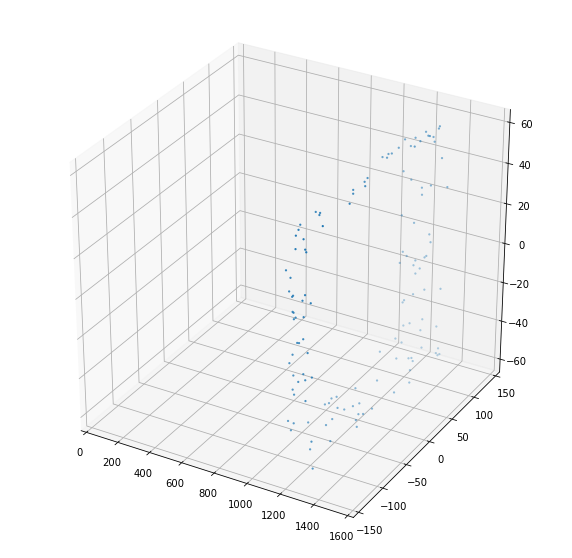

In [52]:
fig = plt.figure(figsize=(10,10))
ax  = fig.add_subplot(projection='3d')

ax.scatter(rand['CARTESIAN_X'][rand['IS_BOUNDARY'].astype(bool)][::10],\
           rand['CARTESIAN_Y'][rand['IS_BOUNDARY'].astype(bool)][::10],\
           rand['CARTESIAN_Z'][rand['IS_BOUNDARY'].astype(bool)][::10],\
           marker='.',\
           lw=0.0)

ax.set_xlim(0.0, 1600.)

In [53]:
np.mean(rand['V'] < np.percentile(rand['V'], 1.))

0.01000014881173827

In [54]:
np.mean(rand['IS_BOUNDARY'].data)

0.019464575365704846

In [55]:
rand['N8'].data.min(), rand['N8'].data.max()

(1, 12)

In [56]:
vol  = fsky(60.) * (cosmo.comoving_volume(0.5).value - cosmo.comoving_volume(0.4).value)
vol8 = (4./3.)*np.pi*(8.**3.)

rand_density = len(rand) / vol

nrand_sphere8 = vol8*rand_density
perror_sphere8 = np.sqrt(nrand_sphere8)

print('{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}'.format(len(rand) / 1.e6, rand_density, nrand_sphere8, perror_sphere8))

0.067	0.010	21.523	4.639


(0.0, 60.0)

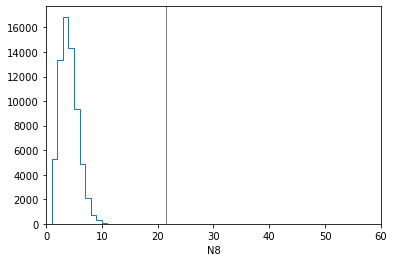

In [57]:
_ = pl.hist(rand['N8'], bins=np.arange(0, 200, 1), histtype='step')
pl.axvline(nrand_sphere8, c='k', lw=0.5)
pl.xlabel('N8')
pl.xlim(0.0, 60.)

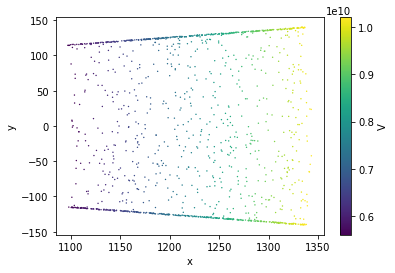

In [58]:
isin = rand['IS_BOUNDARY'].astype(bool)

pl.scatter(rand['CARTESIAN_X'][isin], rand['CARTESIAN_Y'][isin], lw=0.0, c=rand['V'][isin], s=2)
pl.xlabel('x')
pl.ylabel('y')
pl.colorbar(label='V')

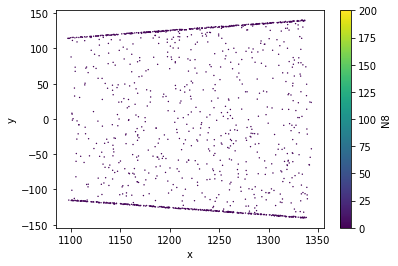

In [59]:
isin = rand['IS_BOUNDARY'].astype(bool)

pl.scatter(rand['CARTESIAN_X'][isin], rand['CARTESIAN_Y'][isin], lw=0.0, c=rand['N8'][isin], vmin=0, vmax=200, s=2)
pl.xlabel('x')
pl.ylabel('y')
pl.colorbar(label='N8')

Text(0, 0.5, 'Random $N_8$')

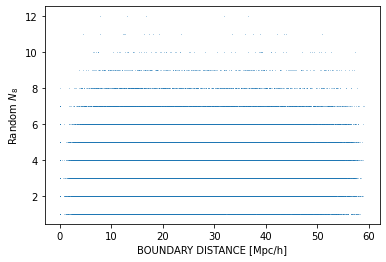

In [60]:
pl.scatter(rand['BOUND_DIST'], rand['N8'], marker='.', lw=0.0, s=1)

pl.xlabel('BOUNDARY DISTANCE [Mpc/h]')
pl.ylabel(r'Random $N_8$')

Text(0.5, 0, 'BOUND_DIST [Mpc/h]')

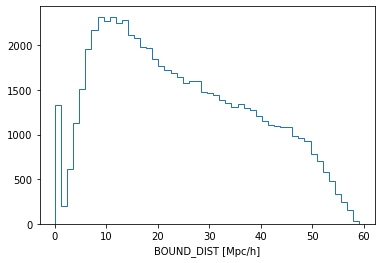

In [61]:
_ = pl.hist(rand['BOUND_DIST'], bins=50, histtype='step')
pl.xlabel('BOUND_DIST [Mpc/h]')

# Done.